# Kırmızı Şarap Kalitesi Tahmini

## Proje Açıklaması
Bu proje, kırmızı şarap kalitesini tahmin etmek için makine öğrenmesi algoritmalarını kullanmayı amaçlamaktadır. **UCI Machine Learning Repository**'den alınan **Red Wine Quality** veri seti kullanılmıştır. Veri setine [buradan](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data) ulaşabilirsiniz.

## Yapılan Adımlar
1. **Veri Keşfi (EDA - Exploratory Data Analysis):**
   - Veri setinin genel yapısı incelendi.
   - Eksik veriler kontrol edildi.
   - Değişkenlerin dağılımı ve korelasyon analizi yapıldı.

2. **Özellik Mühendisliği ve Veri Ön İşleme:**
   - Aykırı değerler analiz edildi ve gerektiğinde temizlendi.
   - Özellik ölçeklendirme (StandardScaler, MinMaxScaler) denendi.
   - Yeni değişkenler oluşturularak modelin performansı artırılmaya çalışıldı.

3. **Modelleme ve Optimizasyon:**
   - Birden fazla makine öğrenmesi algoritması denendi (Linear Regression, Decision Tree, Random Forest, XGBoost, vb.).
   - En iyi model **hiperparametre optimizasyonu** ile belirlendi.
   - Modelin başarımı farklı metrikler (MAE, RMSE, R²) ile değerlendirildi.

## Sonuç ve Değerlendirme
- Yapılan analizler sonucunda **Random Forest Regressor** ve **XGBoost Regressor** en iyi performansı gösterdi.
- Model, şarap kalitesini belirlemede önemli değişkenleri ortaya koydu. 
- Gelecekte daha fazla özellik mühendisliği, derin öğrenme modelleri veya dış veri kaynaklarıyla modelin doğruluğu artırılabilir.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("winequality-red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.shape

(1599, 12)

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###  1. EDA - Gelişmiş Veri Keşfi 

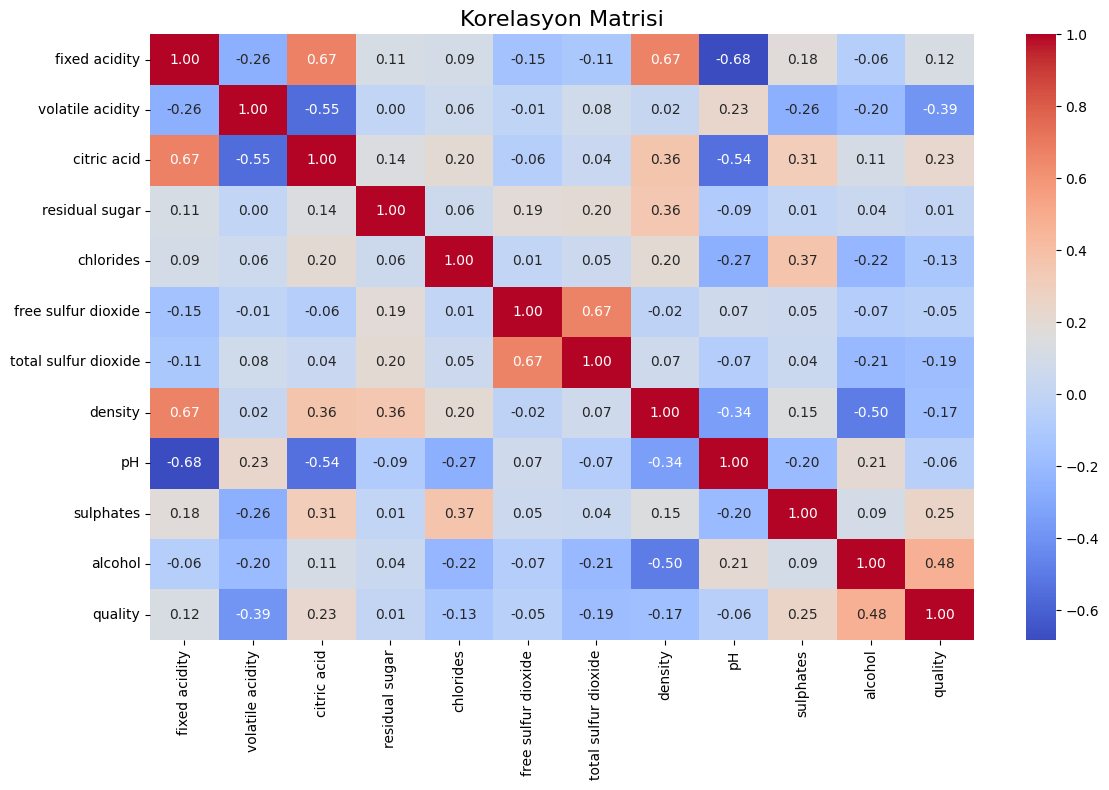

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi", fontsize=16)
plt.tight_layout()
plt.savefig("correlation_matrix.png")
plt.show()

####  Kalite dağılımını incele

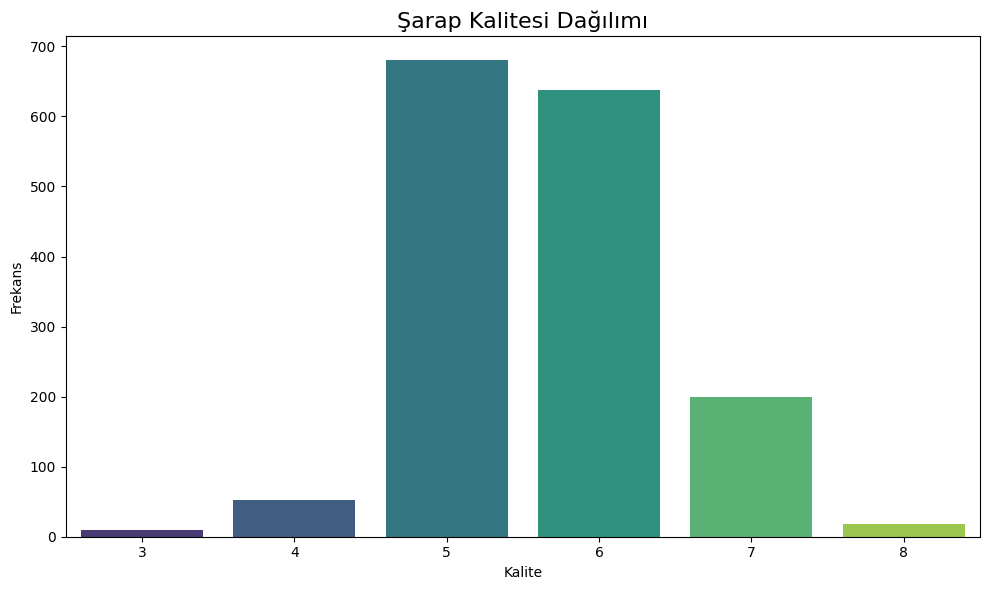


Kalite sınıflarının dağılımı:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x="quality", data=df, palette="viridis")
plt.title("Şarap Kalitesi Dağılımı", fontsize=16)
plt.xlabel("Kalite")
plt.ylabel("Frekans")
plt.tight_layout()
plt.savefig("quality_distribution.png")
plt.show()

print("\nKalite sınıflarının dağılımı:")
print(df["quality"].value_counts().sort_index())

In [12]:
df["quality_category"] = pd.cut(df["quality"], 
                               bins=[0, 4, 6, 10], 
                               labels=["Düşük", "Orta", "Yüksek"])

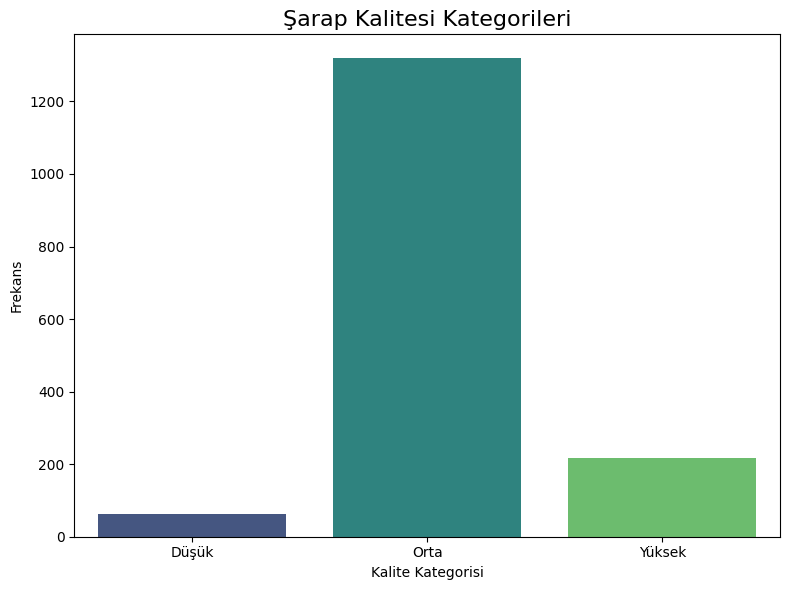

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x="quality_category", data=df, palette="viridis")
plt.title("Şarap Kalitesi Kategorileri", fontsize=16)
plt.xlabel("Kalite Kategorisi")
plt.ylabel("Frekans")
plt.tight_layout()
plt.savefig("quality_categories.png")
plt.show()

####  2. Aykırı Değer Tespiti

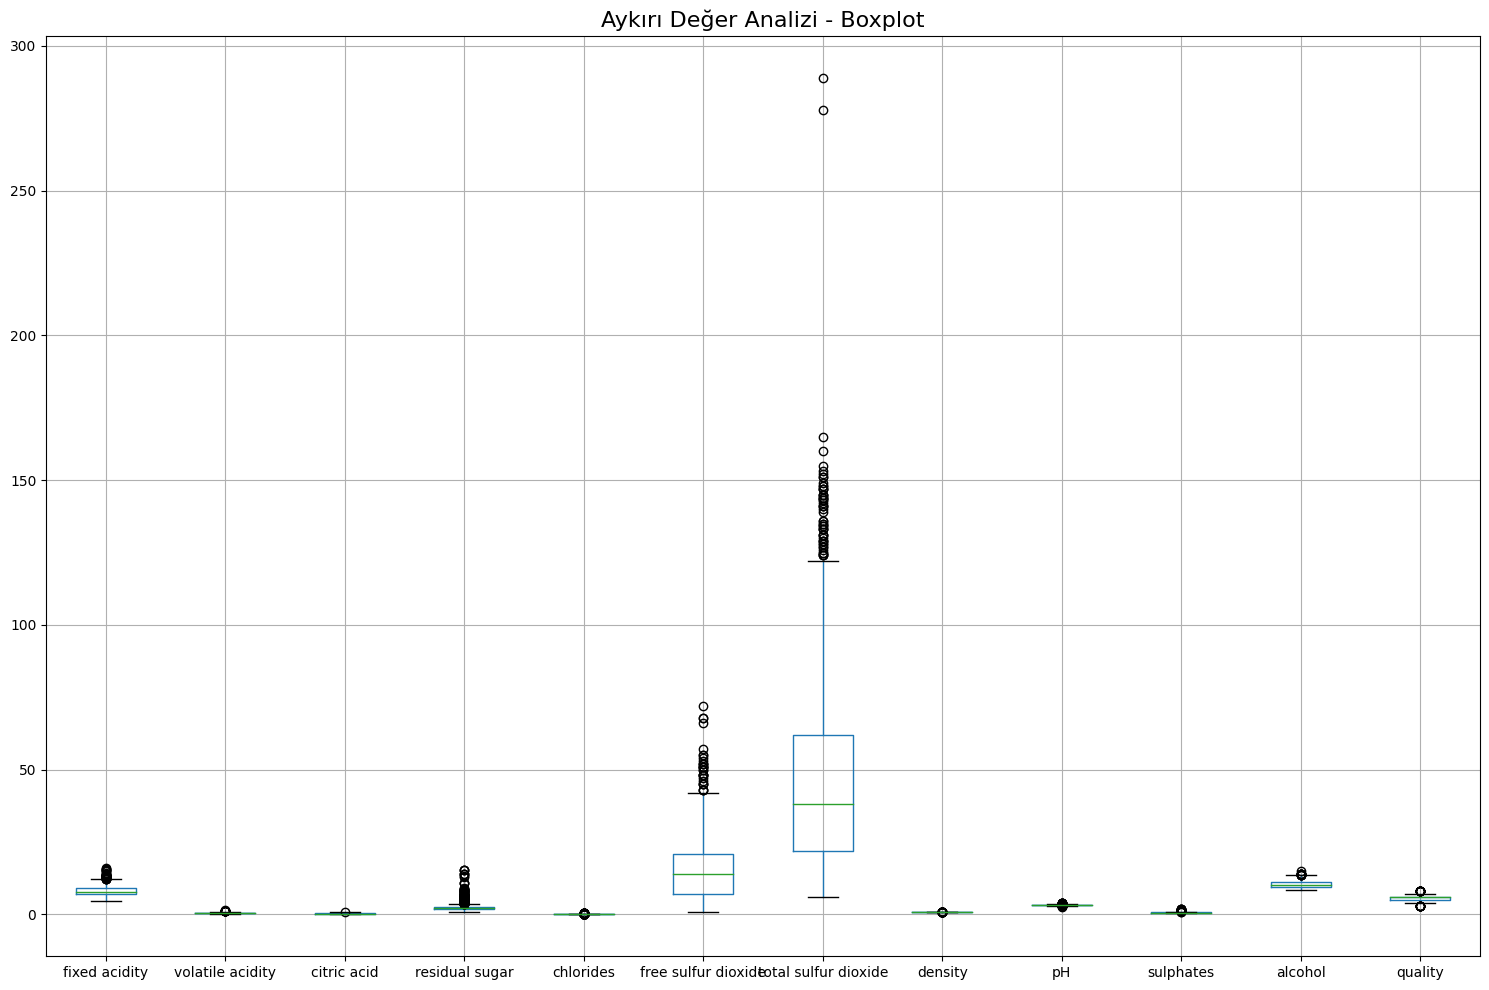

In [15]:
plt.figure(figsize=(15, 10))
df.boxplot(figsize=(15, 10))
plt.title("Aykırı Değer Analizi - Boxplot", fontsize=16)
plt.tight_layout()
plt.savefig("boxplots.png")
plt.show()

#### Her özellik için aykırı değerleri tespit etme

In [17]:
def detect_outliers(df, n_std):
    outliers_dict = {}
    for col in df.columns:
        if df[col].dtype != 'object' and col != 'quality' and col != 'quality_category':
            # IQR metodu ile aykırı değerleri bul
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
            outliers_dict[col] = len(outliers)
    return outliers_dict

outliers = detect_outliers(df, 3)
print("\nAykırı değer sayıları:")
for col, count in outliers.items():
    print(f"{col}: {count} aykırı değer")



Aykırı değer sayıları:
fixed acidity: 49 aykırı değer
volatile acidity: 19 aykırı değer
citric acid: 1 aykırı değer
residual sugar: 155 aykırı değer
chlorides: 112 aykırı değer
free sulfur dioxide: 30 aykırı değer
total sulfur dioxide: 55 aykırı değer
density: 45 aykırı değer
pH: 35 aykırı değer
sulphates: 59 aykırı değer
alcohol: 13 aykırı değer


#### 3. Aykırı değerleri temizleme ve veri ön işleme
IQR metodu ile aykırı değerleri kırpma
IQR (Interquartile Range) metodu, veri setindeki aykırı değerleri belirlemek için kullanılır. Öncelikle veriler sıralanır ve Q1 (birinci çeyrek) ile Q3 (üçüncü çeyrek) hesaplanır. IQR, Q3 ile Q1 arasındaki farktır. Aykırı değerler, Q1 - 1.5 * IQR ve Q3 + 1.5 * IQR formülleri kullanılarak belirlenir. Bu sınırların dışındaki veriler aykırı kabul edilip, kırpılır veya çıkarılır.

In [19]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean


In [21]:
df_with_outliers = df.copy()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('quality')  # quality'yi çıkar
df_without_outliers = remove_outliers_iqr(df, numeric_cols)

print(f"\nAykırı değerler temizlendikten sonra: {df_without_outliers.shape[0]} satır (Önceden: {df.shape[0]})")


Aykırı değerler temizlendikten sonra: 1135 satır (Önceden: 1599)


#### 4. Gelişmiş Kümeleme Analizi
Veriyi standardize et

In [23]:
X_with_outliers = df_with_outliers.drop(["quality", "quality_category"], axis=1)
X_without_outliers = df_without_outliers.drop(["quality", "quality_category"], axis=1)

In [24]:
scaler = StandardScaler()
X_scaled_with_outliers = scaler.fit_transform(X_with_outliers)
X_scaled_without_outliers = scaler.fit_transform(X_without_outliers)

### Elbow Method - Aykırı değerli ve değersiz veri için karşılaştır

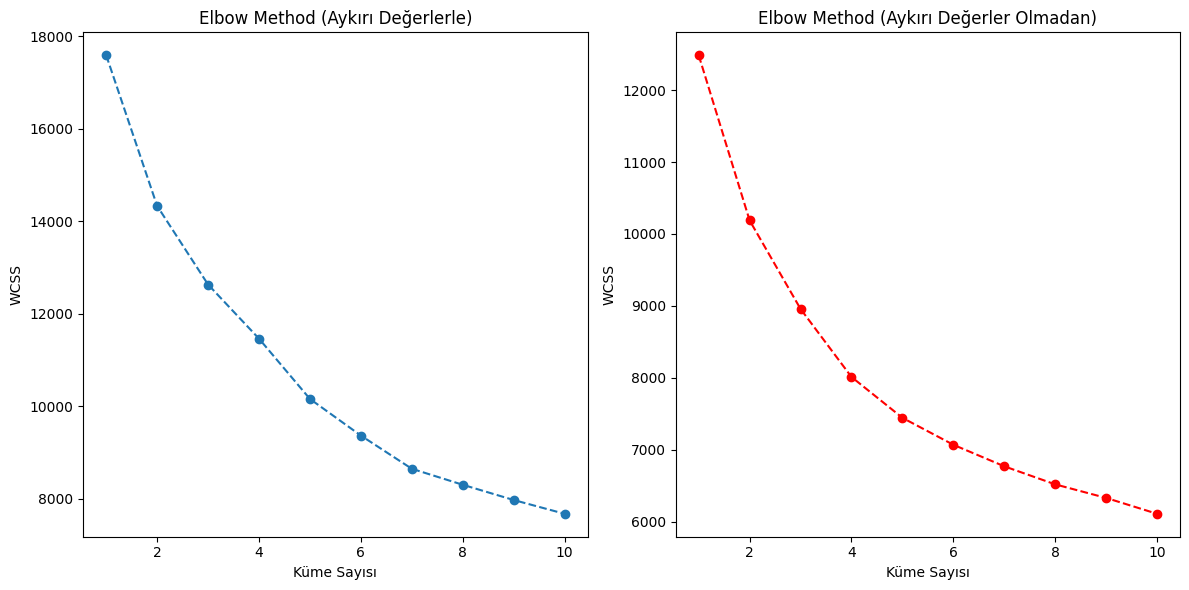

In [26]:
plt.figure(figsize=(12, 6))

wcss_with = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled_with_outliers)
    wcss_with.append(kmeans.inertia_)

wcss_without = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled_without_outliers)
    wcss_without.append(kmeans.inertia_)

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss_with, marker="o", linestyle="--")
plt.xlabel("Küme Sayısı")
plt.ylabel("WCSS")
plt.title("Elbow Method (Aykırı Değerlerle)")

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), wcss_without, marker="o", linestyle="--", color="r")
plt.xlabel("Küme Sayısı")
plt.ylabel("WCSS")
plt.title("Elbow Method (Aykırı Değerler Olmadan)")

plt.tight_layout()
plt.savefig("elbow_method_comparison.png")
plt.show()


####  Silhouette Skoru - Aykırı değerler olmadan

In [28]:
silhouette_scores = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled_without_outliers)
    score = silhouette_score(X_scaled_without_outliers, labels)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Skoru: {score:.3f}")

K=2, Silhouette Skoru: 0.188
K=3, Silhouette Skoru: 0.158
K=4, Silhouette Skoru: 0.163
K=5, Silhouette Skoru: 0.157
K=6, Silhouette Skoru: 0.150
K=7, Silhouette Skoru: 0.136


In [29]:
best_k = np.argmax(silhouette_scores) + 2  # +2 çünkü k=2'den başladık

In [30]:
# Final kümeleme modeli
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_without_outliers["cluster"] = kmeans.fit_predict(X_scaled_without_outliers)

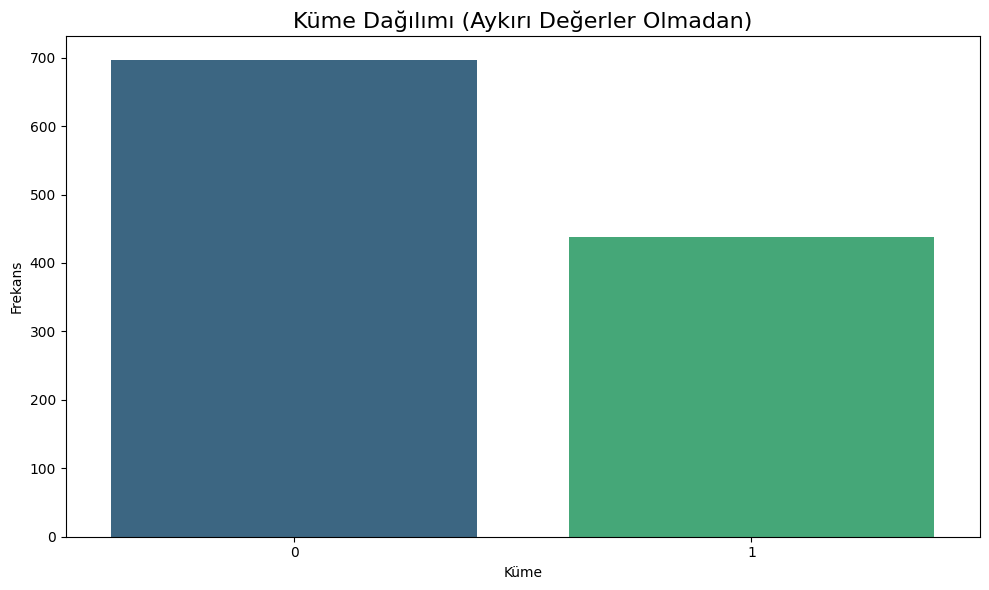

In [31]:
# Küme dağılımını görselleştir
plt.figure(figsize=(10, 6))
sns.countplot(x="cluster", data=df_without_outliers, palette="viridis")
plt.title("Küme Dağılımı (Aykırı Değerler Olmadan)", fontsize=16)
plt.xlabel("Küme")
plt.ylabel("Frekans")
plt.tight_layout()
plt.savefig("cluster_distribution.png")
plt.show()

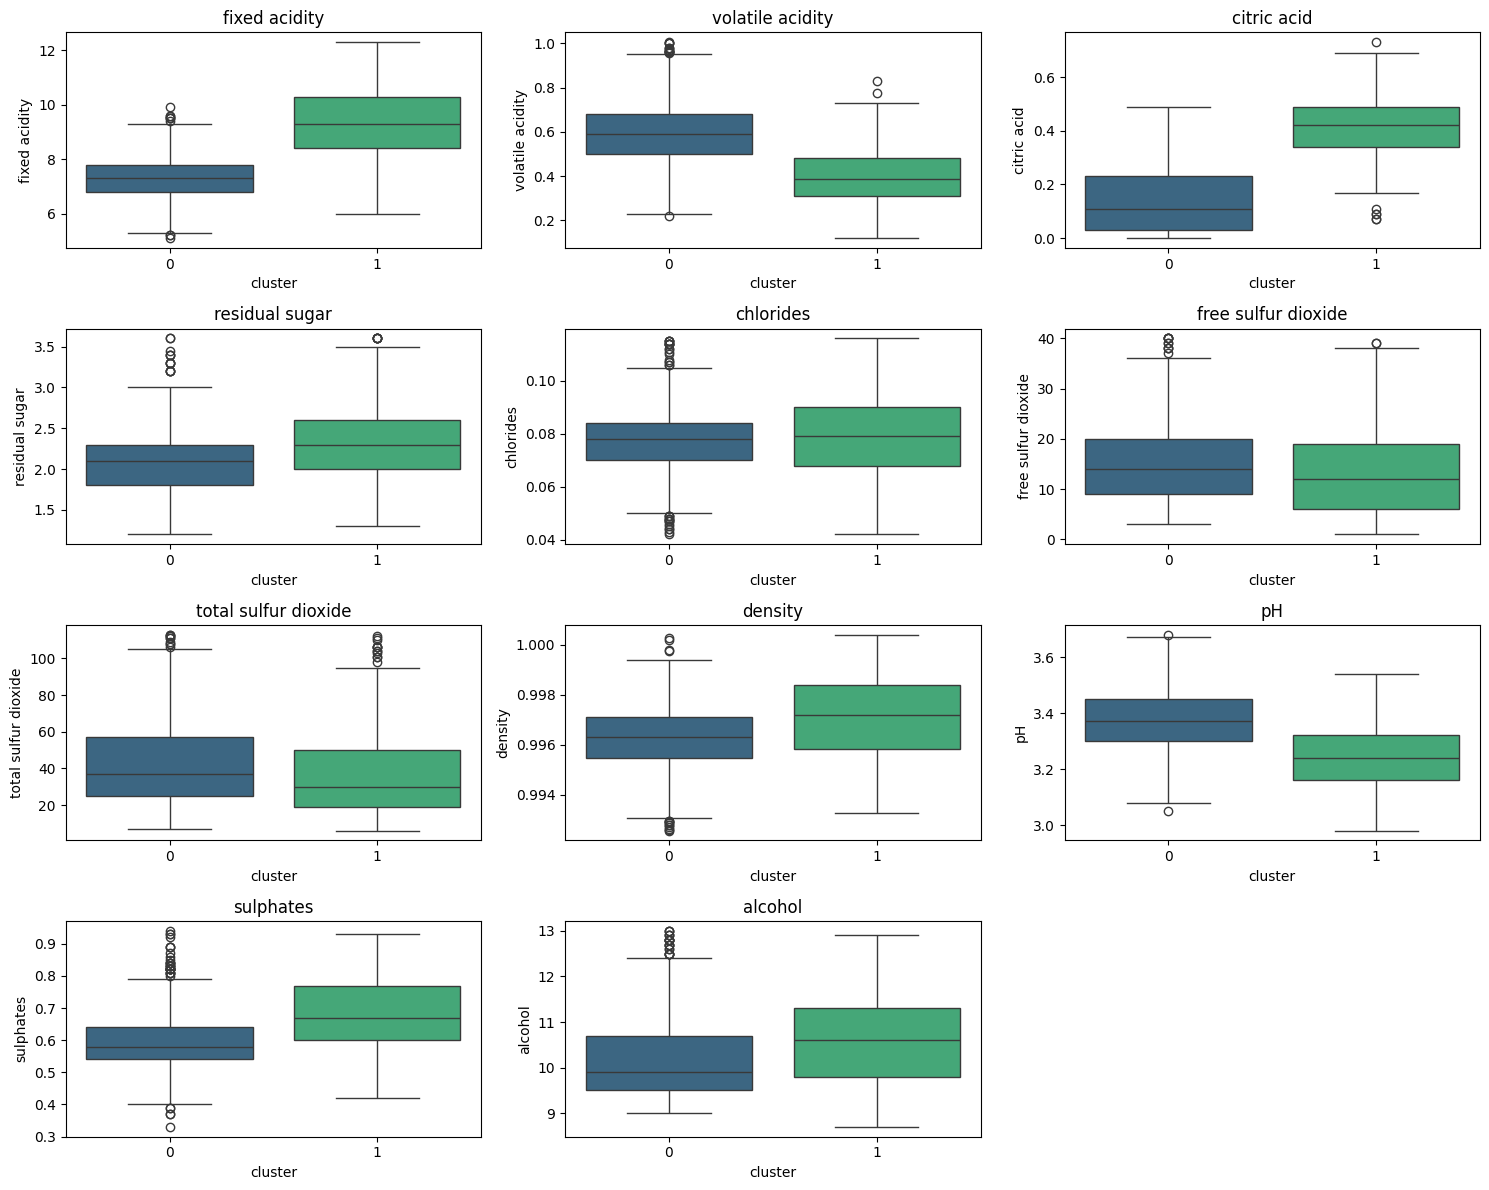

In [32]:
# Kümeleri özellik bazında karşılaştır
plt.figure(figsize=(15, 12))
for i, feature in enumerate(X_without_outliers.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x="cluster", y=feature, data=df_without_outliers, palette="viridis")
    plt.title(f"{feature}")
plt.tight_layout()
plt.savefig("cluster_features.png")
plt.show()

<Figure size 1200x600 with 0 Axes>

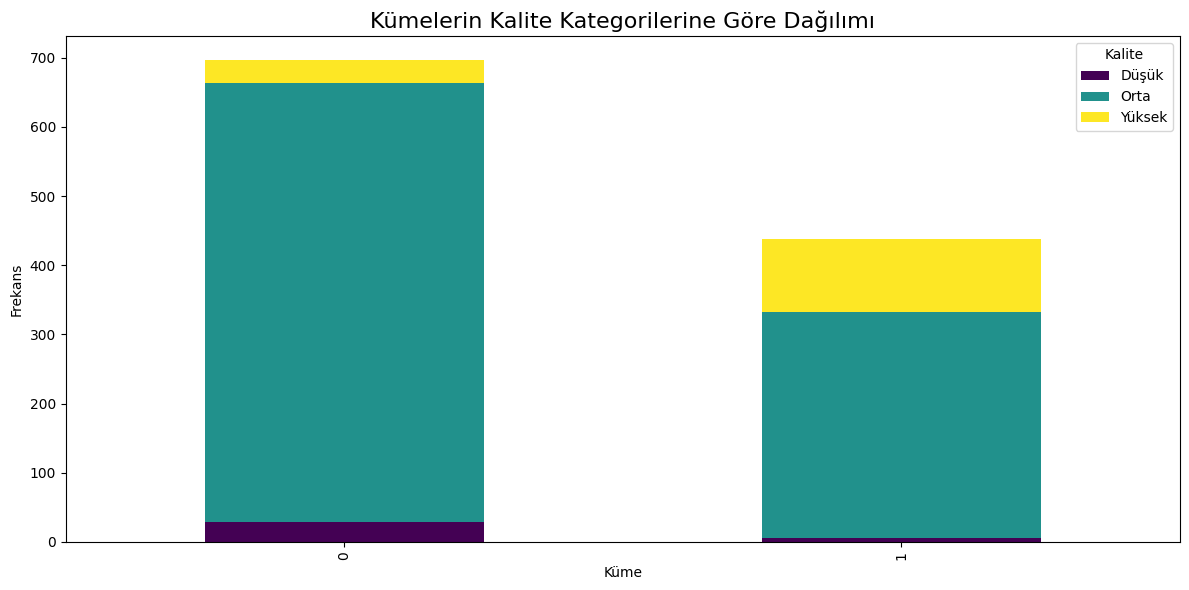

In [33]:
# Kümeleri kalite kategorilerine göre dağılımını kontrol et
plt.figure(figsize=(12, 6))
pd.crosstab(df_without_outliers["cluster"], df_without_outliers["quality_category"]).plot(
    kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Kümelerin Kalite Kategorilerine Göre Dağılımı", fontsize=16)
plt.xlabel("Küme")
plt.ylabel("Frekans")
plt.legend(title="Kalite")
plt.tight_layout()
plt.savefig("clusters_vs_quality.png")
plt.show()

In [34]:
# 5. PCA ile 2 boyuta indirgeme ve görselleştirme
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_without_outliers)

In [35]:
# PCA'in açıkladığı varyans
print(f"\nPCA'nın ilk 2 bileşeni toplam varyansın %{pca.explained_variance_ratio_.sum()*100:.2f}'ini açıklıyor")
print(f"Her bir bileşenin açıkladığı varyans: {pca.explained_variance_ratio_}")


PCA'nın ilk 2 bileşeni toplam varyansın %46.70'ini açıklıyor
Her bir bileşenin açıkladığı varyans: [0.26492234 0.20207328]


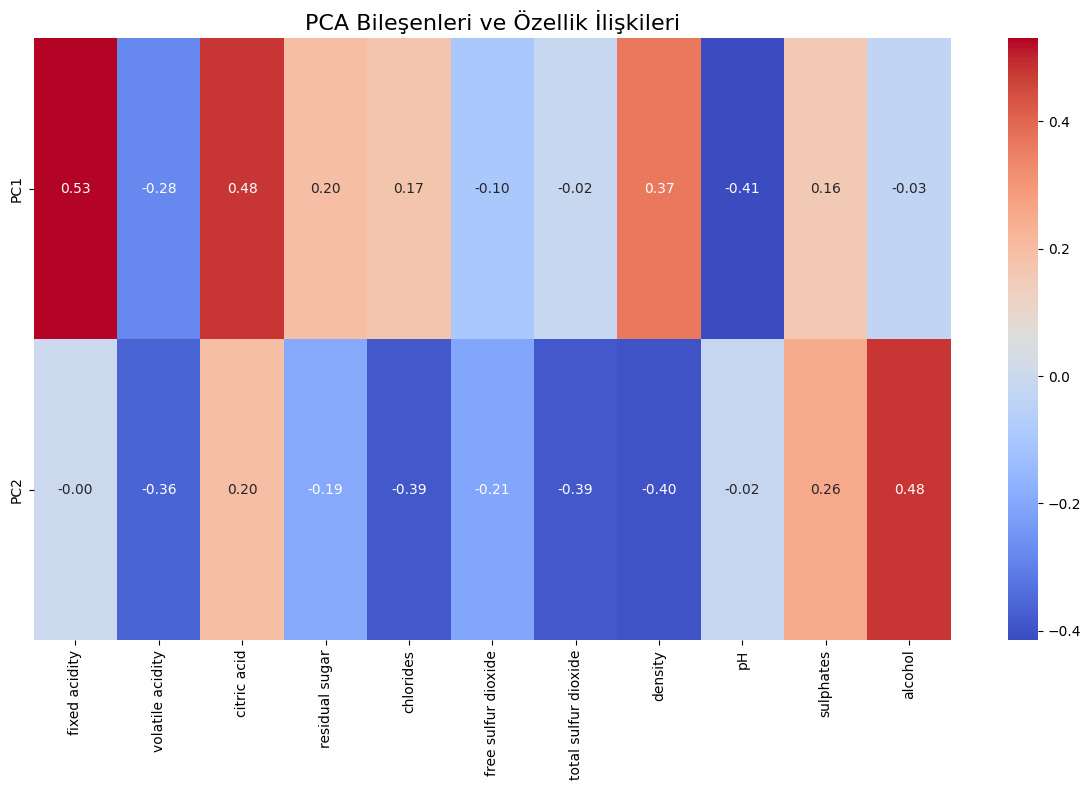

In [36]:
# Bileşenlerin özelliklerle ilişkisi
pca_components = pd.DataFrame(
    pca.components_, 
    columns=X_without_outliers.columns,
    index=['PC1', 'PC2']
)

plt.figure(figsize=(12, 8))
sns.heatmap(pca_components, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("PCA Bileşenleri ve Özellik İlişkileri", fontsize=16)
plt.tight_layout()
plt.savefig("pca_components.png")
plt.show()

Text(0.5, 1.0, 'PCA ile Kümeleme Sonuçları')

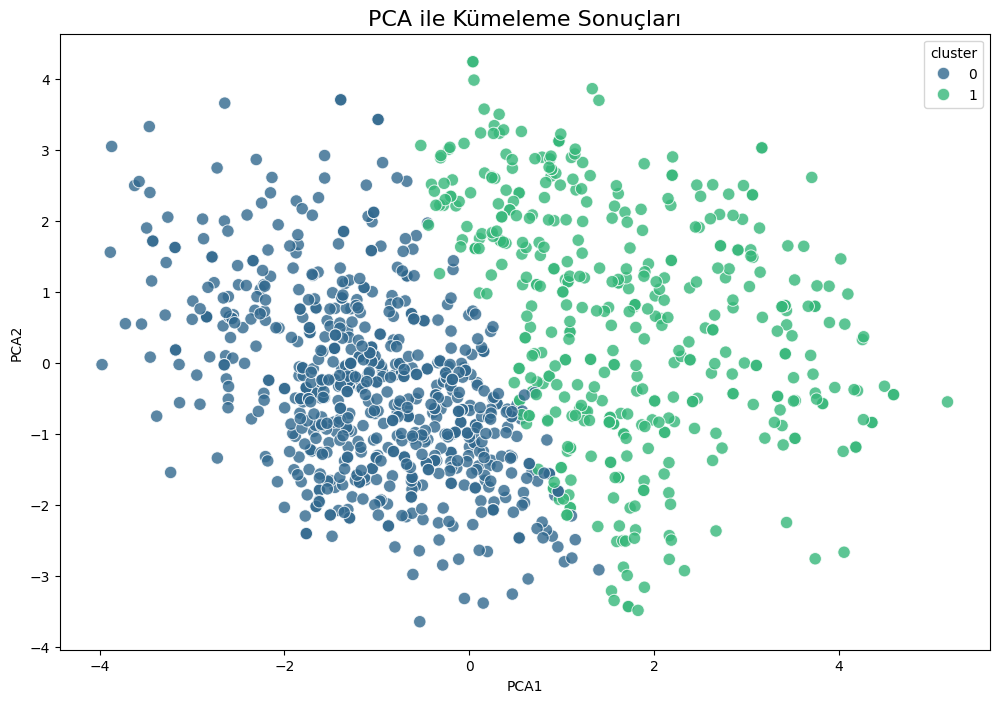

In [37]:
# PCA sonuçlarını dataframe'e ekle
df_without_outliers["PCA1"] = X_pca[:, 0]
df_without_outliers["PCA2"] = X_pca[:, 1]

# Kümeleme sonuçlarını görselleştir
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x="PCA1", y="PCA2", 
    hue="cluster", 
    data=df_without_outliers, 
    palette="viridis",
    s=80, alpha=0.8
)
plt.title("PCA ile Kümeleme Sonuçları", fontsize=16)


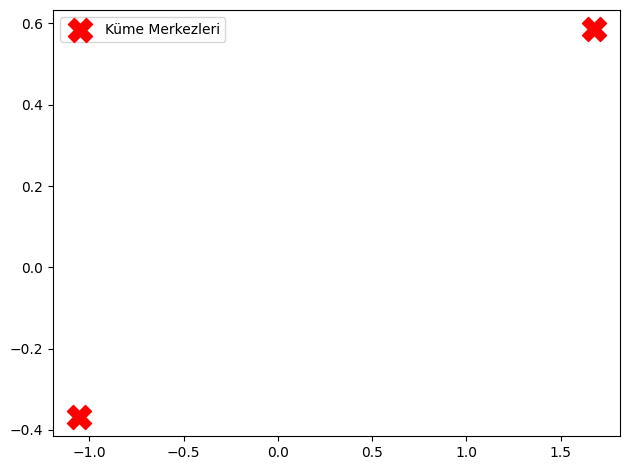

In [38]:
# Küme merkezlerini ekle
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=300, c='red', marker='X', label='Küme Merkezleri')
plt.legend()
plt.tight_layout()
plt.savefig("pca_clusters.png")
plt.show()

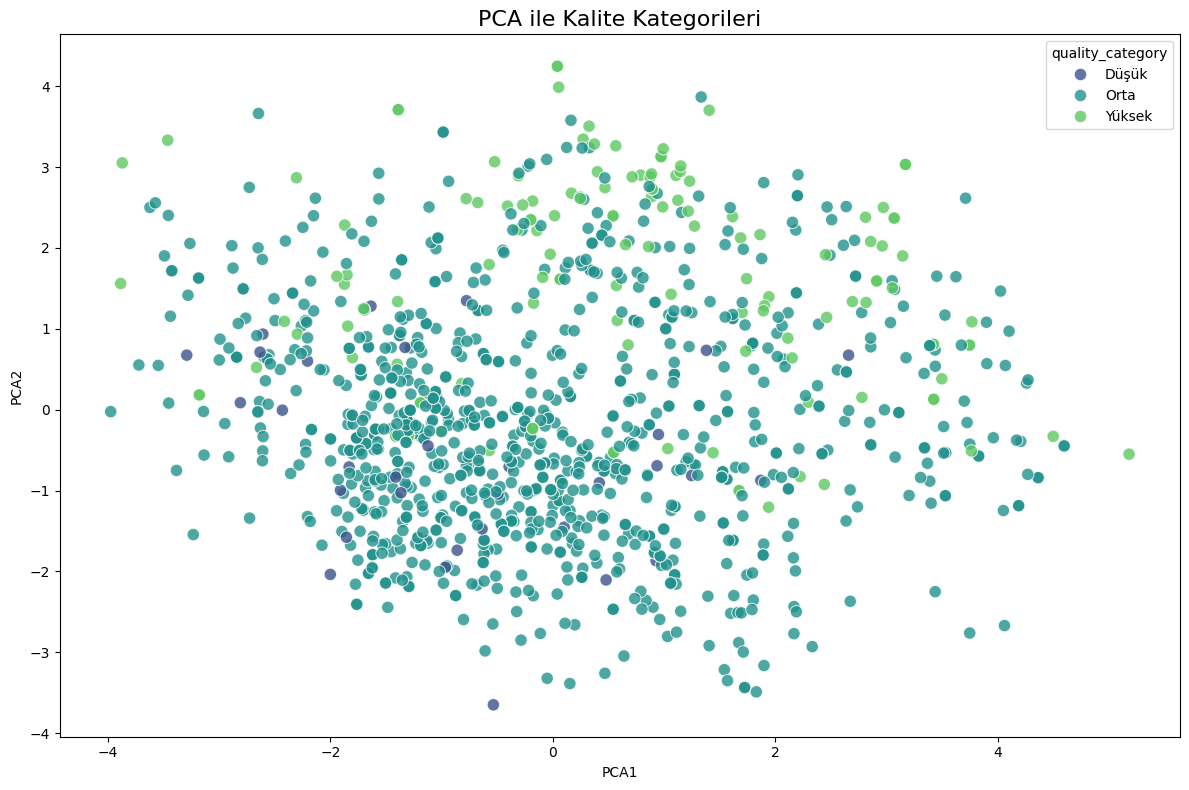

In [39]:
# Kalite kategorisine göre görselleştirme
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x="PCA1", y="PCA2", 
    hue="quality_category", 
    data=df_without_outliers, 
    palette="viridis",
    s=80, alpha=0.8
)
plt.title("PCA ile Kalite Kategorileri", fontsize=16)
plt.tight_layout()
plt.savefig("pca_quality.png")
plt.show()


### 6. Kalite Tahmin Modeli

In [41]:
# Veriyi hazırla
X = df_without_outliers.drop(["quality", "quality_category", "cluster", "PCA1", "PCA2"], axis=1)
y = df_without_outliers["quality_category"]

In [42]:
# Eğitim ve test veri setlerini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
print(f"Eğitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")

Eğitim seti boyutu: (908, 11)
Test seti boyutu: (227, 11)


In [44]:
models = {
    "Lojistik Regresyon": LogisticRegression(max_iter=1000, random_state=42),
    "Destek Vektör Makinesi": SVC(random_state=42),
    "Rastgele Orman": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Cross-validation ile model performanslarını değerlendir
print("\nModel performansları (5-fold cross-validation):")
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")



Model performansları (5-fold cross-validation):
Lojistik Regresyon: 0.8668 (±0.0162)
Destek Vektör Makinesi: 0.8580 (±0.0165)
Rastgele Orman: 0.8943 (±0.0159)
Gradient Boosting: 0.8778 (±0.0116)


In [45]:
best_model = RandomForestClassifier(random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_model)
])

# Hiperparametre optimizasyonu
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"\nEn iyi hiperparametreler: {grid_search.best_params_}")
print(f"En iyi CV skoru: {grid_search.best_score_:.4f}")

# Final model
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)

# Model değerlendirme
print("\nTest seti sonuçları:")
print(f"Doğruluk (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


En iyi hiperparametreler: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}
En iyi CV skoru: 0.8954

Test seti sonuçları:
Doğruluk (Accuracy): 0.8811

Sınıflandırma Raporu:
              precision    recall  f1-score   support

       Düşük       0.00      0.00      0.00         7
        Orta       0.89      0.98      0.93       192
      Yüksek       0.75      0.43      0.55        28

    accuracy                           0.88       227
   macro avg       0.55      0.47      0.49       227
weighted avg       0.85      0.88      0.86       227



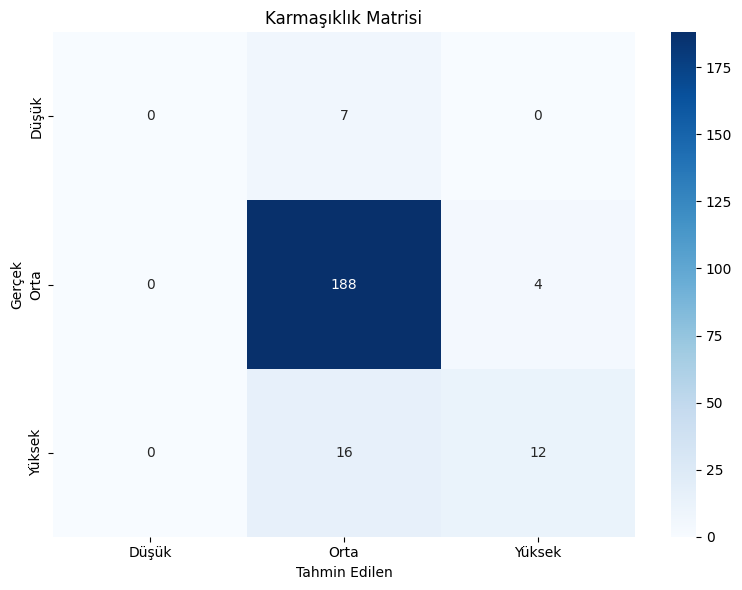

In [46]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_model.classes_, yticklabels=final_model.classes_)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karmaşıklık Matrisi')
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()

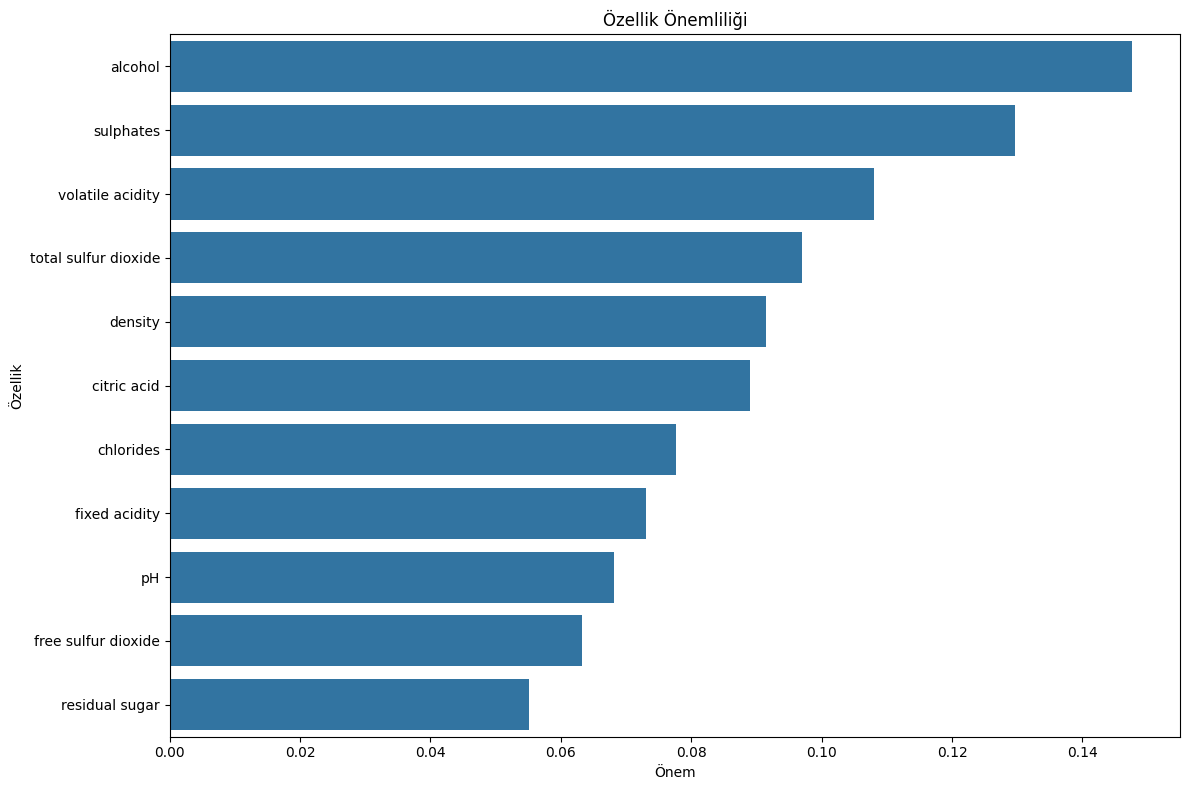


Özellik önemliliği:
                 Özellik      Önem
10               alcohol  0.147576
9              sulphates  0.129716
1       volatile acidity  0.107973
6   total sulfur dioxide  0.096941
7                density  0.091429
2            citric acid  0.089009
4              chlorides  0.077674
0          fixed acidity  0.073021
8                     pH  0.068221
5    free sulfur dioxide  0.063314
3         residual sugar  0.055125


In [47]:
# Özellik önemliliği
if hasattr(final_model[-1], 'feature_importances_'):
    importance = final_model[-1].feature_importances_
    feature_importance = pd.DataFrame({
        'Özellik': X.columns,
        'Önem': importance
    }).sort_values('Önem', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Önem', y='Özellik', data=feature_importance)
    plt.title('Özellik Önemliliği')
    plt.tight_layout()
    plt.savefig("feature_importance.png")
    plt.show()
    
    print("\nÖzellik önemliliği:")
    print(feature_importance)